In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import keras
#plt.imshow



Colocar un cuadrado gris en el interior del cuadrado


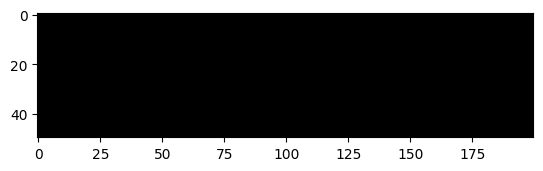

In [38]:
#variable con ceros
alto = 50
ancho = 200
mi_arreglo = np.zeros((alto,ancho))
#print('las dimensiones del arreglo son: ',mi_arreglo.shape);
plt.imshow(mi_arreglo,cmap='gray')
#plt.imshow(mi_arreglo)

In [39]:

mi_arreglo[10:40,40:150]= 1
mi_arreglo[20:30,60:130] = 0.5



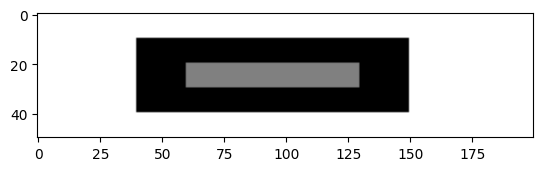

In [40]:
plt.imshow(-mi_arreglo,cmap='gray')

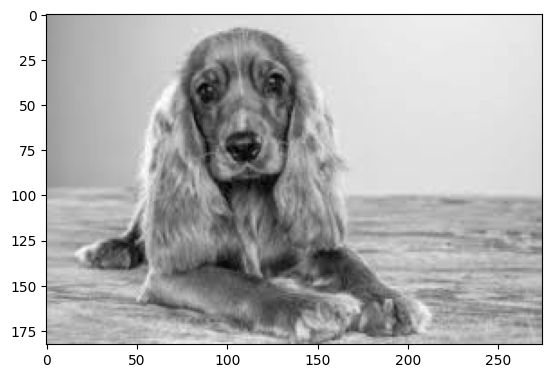

In [60]:
arch = 'perro.jfif'
#img_tmp = plt.imread(arch)
img_tmp1 = cv2.imread(arch,0)
#img_tmp = cv2.cvtColor(img_tmp1,cv2.COLOR_BGR2RGB)
plt.imshow(img_tmp1, cmap='gray')

In [72]:
type(img_tmp1)
img_tmp1.max(),img_tmp1.min()

(255, 0)

In [73]:
h,w=img_tmp1.shape
print(h,w)
input_img  = Input(shape=(h,w,1))
x = Conv2D(1,(1,1), activation = 'relu', padding = 'same')(input_img) #se crea un solo kernel de tamaño solo un pixel
modelo1 = Model(input_img,x)
#autoencoder = keras.Model(input_img,x)

183 275


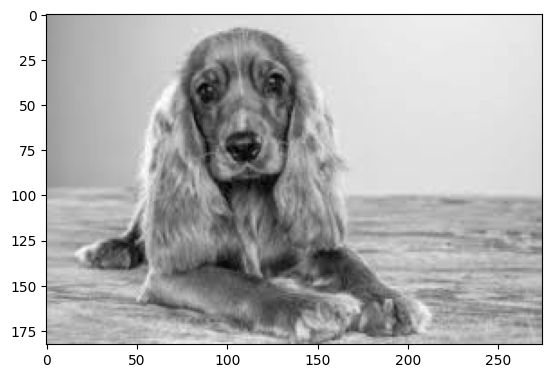

In [77]:
modelo1.set_weights([np.array([[[[100.0]]]],dtype=np.float32),np.array([-50.0],dtype=np.float32)])# matriz de pesos
#el primero es una matriz de pesos
#el valor que se le suma a las bases es -50
img_resized = np.reshape(img_tmp1,(1,h,w,1))
img_final = np.reshape(img_resized,(h,w))
plt.imshow(img_final,cmap='gray')
#mgs = {}
#imgs['original'] = img_resized
#imgs['treshold50'] = modelo1.predict(img_tmp1['grises'])

In [ ]:
#MaxPooling2D
x = conv2D(1,(1,1), activation = 'relu', padding = 'same')(input_img)
X = MaxPooling2D((2,2), padding = 'same')(x)
modelo2 = Model(input_img,X)
#print(modelo2.)

In [79]:
from IPython.display import Image
import numpy as np
import time
import os
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import glob
import cv2
import json
from matplotlib import pyplot as plt
import keras



# rutina que imprime imágenes y algunas de sus características
# las imágenes son en escala de grises, flotante
def ver_imgs_gris(noms):
  global imgs
  n=len(noms)
  plt.clf()
  plt.figure(figsize=(6, n*5))
  #plt.figure()#figsize=(20, 4))
  for i in range(n):
      img=imgs[noms[i]]
      print(noms[i],img.shape,'min:',img.min(),'max:',img.max(),'esquina:',img[0,0,0,0])
      #h,w=imgs[i].shape
      ax = plt.subplot(n, 1, i+1)
      plt.imshow(-img[0,:,:,0])
#      plt.imshow(imgs[i].reshape(h, w))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.set_title(noms[i])
  return plt.show()

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

In [81]:
mi_arreglo = np.zeros((alto,ancho))
mi_arreglo[10:40,40:150]= 1
h,w=mi_arreglo.shape
print(h,w)
input_img  = Input(shape=(h,w,1))

50 200


arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


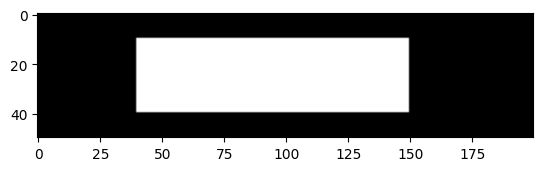

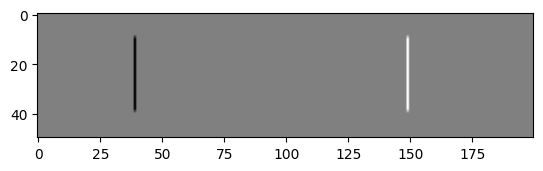

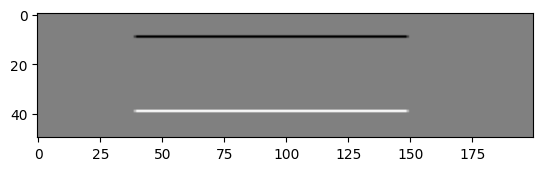

In [104]:

#input_img  = Input(shape=(h,w,1))
x = Conv2D(2,(2,2), activation = 'linear', padding = 'same')(input_img)
modelo3 = Model(input_img,x)

filtro1 = [
    [1,-1],
    [1,-1]
]
filtro2 = [
    [1,1],
    [-1,-1]
]
filtro3 = [
    [-1,1],
    [1,-1]
]
filtro4 = [
    [-1,-1],
    [1,1]
]

fitros = reformar_filtros([filtro1,filtro2])
modelo3.set_weights([fitros,np.array([0,0],dtype=np.float32)])
#predecir con el modelo
img_resized = np.reshape(mi_arreglo,(1,h,w,1))
#img_final = np.reshape(img_resized,(h,w))
#plt.imshow(img_final,cmap='gray')

#model predict
img_tmp4 = modelo3.predict(img_resized)
img_final2 = np.reshape(img_tmp4,(h,w,2))
img_filtro1 = img_final2[:,:,0]
img_filtro2 = img_final2[:,:,1]

plt.imshow(mi_arreglo,cmap='gray')
plt.show()
plt.imshow(img_filtro1,cmap='gray')
plt.show()
plt.imshow(img_filtro2,cmap='gray')
plt.show()
#img_tmp4 = modelo3.predict(mi_arreglo)


183 275
arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


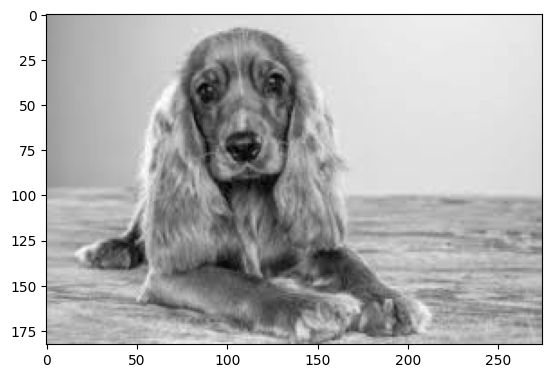

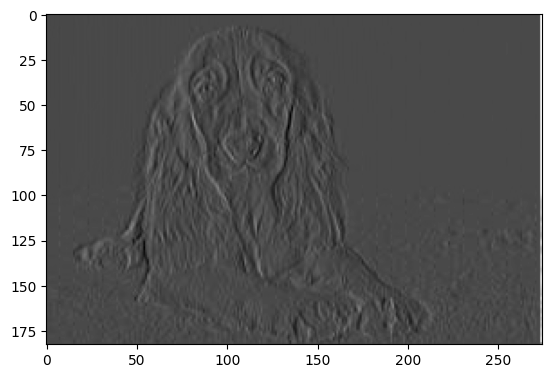

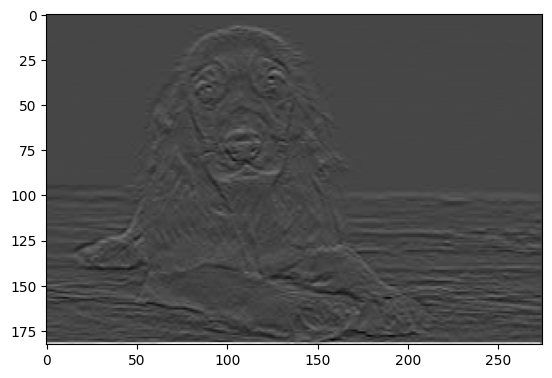

In [106]:
h,w=img_tmp1.shape
print(h,w)
input_img  = Input(shape=(h,w,1))
#input_img  = Input(shape=(h,w,1))
x = Conv2D(2,(2,2), activation = 'linear', padding = 'same')(input_img)
modelo3 = Model(input_img,x)

filtro1 = [
    [1,-1],
    [1,-1]
]
filtro2 = [
    [1,1],
    [-1,-1]
]
filtro3 = [
    [-1,1],
    [1,-1]
]
filtro4 = [
    [-1,-1],
    [1,1]
]

fitros = reformar_filtros([filtro1,filtro2])
modelo3.set_weights([fitros,np.array([0,0],dtype=np.float32)])
#predecir con el modelo
img_resized = np.reshape(img_tmp1,(1,h,w,1))
#img_final = np.reshape(img_resized,(h,w))
#plt.imshow(img_final,cmap='gray')

#model predict
img_tmp4 = modelo3.predict(img_resized)
img_final2 = np.reshape(img_tmp4,(h,w,2))
img_filtro1 = img_final2[:,:,0]
img_filtro2 = img_final2[:,:,1]

plt.imshow(img_tmp1,cmap='gray')
plt.show()
plt.imshow(img_filtro1,cmap='gray')
plt.show()
plt.imshow(img_filtro2,cmap='gray')
plt.show()

50 200
arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


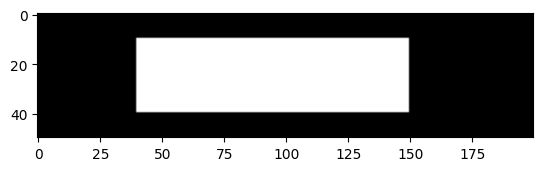

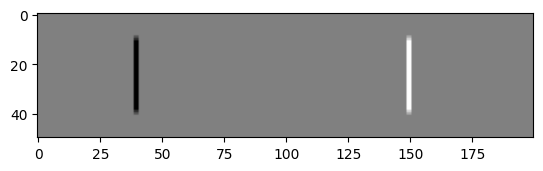

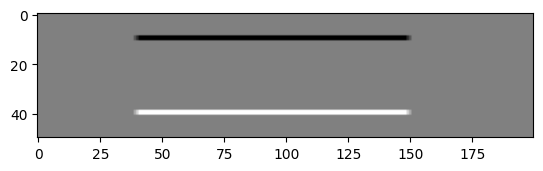

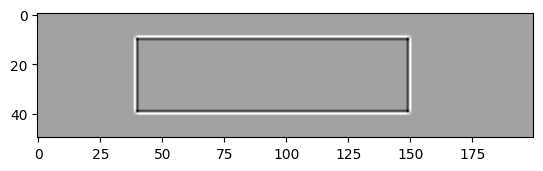

In [110]:
h,w=mi_arreglo.shape
print(h,w)
input_img  = Input(shape=(h,w,1))
#input_img  = Input(shape=(h,w,1))
x = Conv2D(3,(3,3), activation = 'linear', padding = 'same')(input_img)
modelo3 = Model(input_img,x)

filtro1 = [
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
]
filtro2 = [
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
]
filtro3 = [
    [1,2,1],
    [2,-12,2],
    [1,2,1]
]

fitros = reformar_filtros([filtro1,filtro2,filtro3])
modelo3.set_weights([fitros,np.array([0,0,0],dtype=np.float32)])
#predecir con el modelo
img_resized = np.reshape(mi_arreglo,(1,h,w,1))
#img_final = np.reshape(img_resized,(h,w))
#plt.imshow(img_final,cmap='gray')

#model predict
img_tmp4 = modelo3.predict(img_resized)
img_final2 = np.reshape(img_tmp4,(h,w,3))
img_filtro1 = img_final2[:,:,0]
img_filtro2 = img_final2[:,:,1]
img_filtro3 = img_final2[:,:,2]
plt.imshow(mi_arreglo,cmap='gray')
plt.show()
plt.imshow(img_filtro1,cmap='gray')
plt.show()
plt.imshow(img_filtro2,cmap='gray')
plt.show()
plt.imshow(img_filtro3,cmap='gray')
plt.show()